In [45]:
# Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import datetime as dt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [42]:
# Data Cleaning and Preparation
df = pd.read_csv('customer_analysis.csv', sep="\\t")
df.fillna(method='ffill', inplace=True)
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')
cat_cols = ['Education', 'Marital_Status']
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])
display(df)


C:\Users\jerel\AppData\Local\Temp\ipykernel_25384\1005134355.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df = pd.read_csv('customer_analysis.csv', sep="\\t")
C:\Users\jerel\AppData\Local\Temp\ipykernel_25384\1005134355.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,2,4,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,2,4,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,2,5,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,2,5,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,4,3,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,2,3,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,4,5,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,2,2,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,3,5,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [43]:
# Feature Engineering
# 1. Age Extraction
df['Age'] = dt.datetime.now().year - df['Year_Birth']

# 2. Spending Power
df['Spent'] = df.groupby('ID')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum().sum(axis=1)

# 3. Household Living Arrangement
df['Living_With'] = df['Marital_Status'].replace({4: 'Alone', 5: 'With Partner', 3: 'With Spouse', 2: 'Alone'})

# 4. Family Dynamics
df['Children'] = df['Kidhome'] + df['Teenhome']

# 5. Family Unity
df['Family_Size'] = df['Kidhome'] + df['Teenhome'] + 2

# 6. Parental Status
df['Is_Parent'] = df['Kidhome'] + df['Teenhome']
df['Is_Parent'] = df['Is_Parent'].apply(lambda x: 1 if x > 0 else 0)

# 7. Educational Evolution
df['Educational'] = df['Education'].replace({2: 'Undergraduate', 3: 'Graduate', 4: 'Postgraduate'})

# 8. Farewell to Redundancy
df = df.drop(['Year_Birth', 'Dt_Customer'], axis=1)

df = df.dropna()
display(df)

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,Z_CostContact,Z_Revenue,Response,Age,Spent,Living_With,Children,Family_Size,Is_Parent,Educational
0,5524,2,4,58138.0,0,0,58,635,88,546,...,3,11,1,66,1198.0,Alone,0,2,0,Undergraduate
1,2174,2,4,46344.0,1,1,38,11,1,6,...,3,11,0,69,577.0,Alone,2,4,1,Undergraduate
9,5899,4,5,5648.0,1,1,68,28,0,6,...,3,11,0,73,120.0,With Partner,2,4,1,Postgraduate
13,8180,3,2,59354.0,1,1,53,233,2,53,...,3,11,0,71,32.0,Alone,2,4,1,Graduate
17,4939,2,5,37760.0,0,0,20,84,5,38,...,3,11,0,77,1028.0,With Partner,0,2,0,Undergraduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2217,9589,4,6,82032.0,0,0,54,332,194,377,...,3,11,0,75,23.0,6,0,2,0,Postgraduate
2223,1448,3,3,33562.0,1,2,33,21,12,12,...,3,11,0,60,1826.0,With Spouse,3,5,1,Graduate
2225,4749,2,5,58554.0,1,1,55,368,24,68,...,3,11,0,55,1617.0,With Partner,2,4,1,Undergraduate
2227,4201,2,4,57967.0,0,1,39,229,7,137,...,3,11,0,61,210.0,Alone,1,3,1,Undergraduate


In [35]:
# Data Preparation

#Label Encoding
cat_cols = ['Education', 'Marital_Status']
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

# Scaling
scaler = StandardScaler()
cols_to_scale = ['Age', 'Income', 'Spent', 'Children', 'Family_Size']
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

# Dimensionality Reduction
cols_to_include = ['Age', 'Income', 'Spent', 'Children', 'Family_Size', 'Is_Parent', 'Education', 'Marital_Status']
pca = pca(n_components=2)
df_pca = pca.fit_transform(df[cols_to_include])

C:\Users\jerel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jerel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jerel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

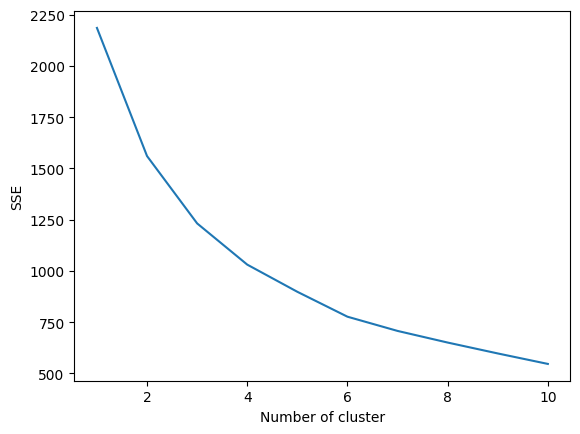

C:\Users\jerel\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


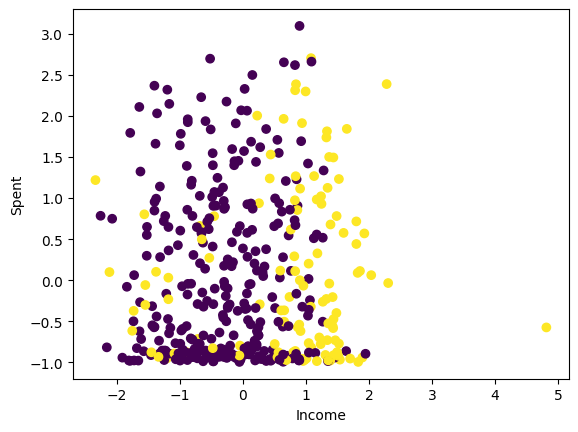

In [49]:
# Clustering

#Elbow Method
scaler = StandardScaler()
cols_to_cluster = ['Age', 'Income', 'Spent', 'Children', 'Family_Size']
df[cols_to_cluster] = scaler.fit_transform(df[cols_to_cluster])
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(df[cols_to_cluster])
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

#Agglomerative Clustering
clustering = AgglomerativeClustering(n_clusters=2).fit(df[cols_to_cluster])

#Scatter Plot Revelations
kmeans = KMeans(n_clusters=2).fit(df[cols_to_cluster])
plt.scatter(df['Income'], df['Spent'], c=kmeans.labels_)
plt.xlabel('Income')
plt.ylabel('Spent')
plt.show()
